In [9]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel, write_stan_json
import arviz as az
import matplotlib.pyplot as plt

az.style.use("arviz-grayscale")

[]

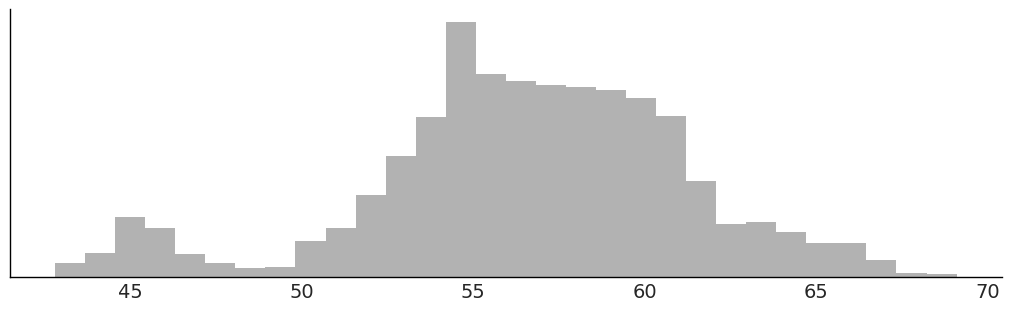

In [14]:
cs = pd.read_csv("https://raw.githubusercontent.com/aloctavodia/BAP3/main/code/data/chemical_shifts_theo_exp.csv")
cs_exp = cs['exp']
_, ax = plt.subplots(figsize=(10, 3))
ax.hist(cs_exp, density=True, bins=30, alpha=0.3)
ax.set_yticks([])

In [22]:
model = CmdStanModel(stan_file="normalmixture.stan", cpp_options={'STAN_THREADS': 'TRUE'},
                     force_compile = True)

14:35:44 - cmdstanpy - INFO - compiling stan file /home/harrison/Desktop/gitHubRepos/HPCStatsPortfolio/PythonProjects/Bayesian_stats/mixtures/normalmixture.stan to exe file /home/harrison/Desktop/gitHubRepos/HPCStatsPortfolio/PythonProjects/Bayesian_stats/mixtures/normalmixture


14:36:10 - cmdstanpy - INFO - compiled model executable: /home/harrison/Desktop/gitHubRepos/HPCStatsPortfolio/PythonProjects/Bayesian_stats/mixtures/normalmixture


In [16]:
data = {'N': len(cs_exp),
        'K': 2,
        'y': cs_exp.values}

write_stan_json("/home/harrison/Desktop/gitHubRepos/HPCStatsPortfolio/PythonProjects/Bayesian_stats/mixtures/data.json", data = data)

In [33]:
#   init values for initialisation
def stan_init():
    init_dict = {}
    init_dict["mu"] = [cs_exp.mean() - 1, cs_exp.mean() + 1] 
    return np.array(init_dict)
stan_init()

array({'mu': [55.51028716216216, 57.51028716216216]}, dtype=object)

In [35]:
fit = model.sample("data.json", chains = 4 , iter_sampling=1000, parallel_chains = 4)

15:03:14 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |██▎       | 00:20 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |███▋      | 00:27 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:31 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:34 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:36 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:39 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:42 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:45 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |███████▋  | 00:48 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:51 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:54 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:57 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 01:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


c


15:04:49 - cmdstanpy - INFO - CmdStan done processing.
15:04:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'normalmixture.stan', line 20, column 6 to column 49)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'normalmixture.stan', line 20, column 6 to column 49)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'normalmixture.stan', line 20, column 6 to column 49)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'normalmixture.stan', line 20, column 6 to column 49)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'normalmixture.stan', line 20, column 6 to column 49)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'normalmixture.stan', line 20, column 6 to column 49)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'normalmixture.stan', l

/home/harrison/anaconda3/envs/cmdstanpyenv/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/harrison/anaconda3/envs/cmdstanpyenv/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:


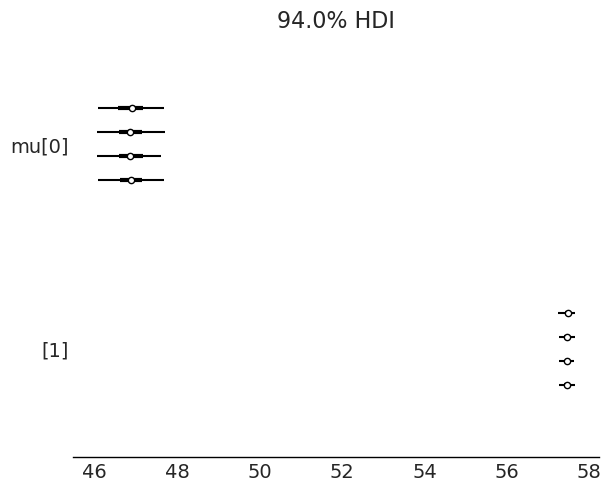

In [36]:
az.plot_forest(fit, var_names=['mu']);